# Publication Figures

Here we try to set up some default plotting styles for scientific publications. 

## Figure Sizes

In a paper we generally have two types of plot. 

   1. A full column width plot
   1. A double column width plot
   
The height is free to vary up to the height of a page (minus any caption text height). Below are some standard column and page sizes for various journals. 

### A&A
   1. 1 column = 88 mm
   1. 2 column = 180 mm

### MNRAS
   1. 1 column = 84 mm
   1. 2 column = 
   1. 300 < dpi < 800 (image & image + labeling)

### APJ
   1. 1 column = 86 mm
   1. 2 column = 180 mm

Based on the above we should set the figure sizes to be 88 or 180 mm wide for one and two column formats. Assuming a dpi of 800 (giving 3.46 inches (88 mm) * 800 = 2768 pixels) results in the following file sizes for 2768 x 2768 pixel images in various image formats:

   1. 1.56 MB 100% JPG
   1. 4.45 MB Lossless PNG

## Standard Exoplanet Figures to Plot

   1. Photometry + model + residuals
   1. Follow-up photometry (may be 1 to many lightcurves) + model/labels + residuals
   1. Radial velocity curve + model + residuals
   1. Radial velocity checks (Bisectors, FWHM etc)
   1. High-spatial resolution (AO, Lucky Imaging) image
   1. MCMC Corner plot

### Font

   1. Times New Roman

### Axes + Ticks

   1. Light axes weights
   1. Internal ticks (major + minor)

### Labels

### Colours

   1. Not Jet!

### Multiple Plot + Axis Sharing

There is a nice method of creating multiple plots using ```subplot2grid```

## Plot Settings

Here we define some general purpose and one/two columns specific settings for plotting with matplotlib. Notes on how to tweak matplotlib via the ```rc``` command can be found [here](http://matplotlib.org/users/customizing.html#matplotlib-rcparams)

The plan is to make a bunch of functions that come in a small package. People can then import the package and call the functions to tweak matplotlib and the plot as they wish. We can also define a few templates for known plots that appear over and over again. 

## Examples

In [2]:
import random
import batman
import numpy as np
import matplotlib.pyplot as plt
from publications.plots.defaults import (
    general,
    one_column
    )

<Container object of 3 artists>

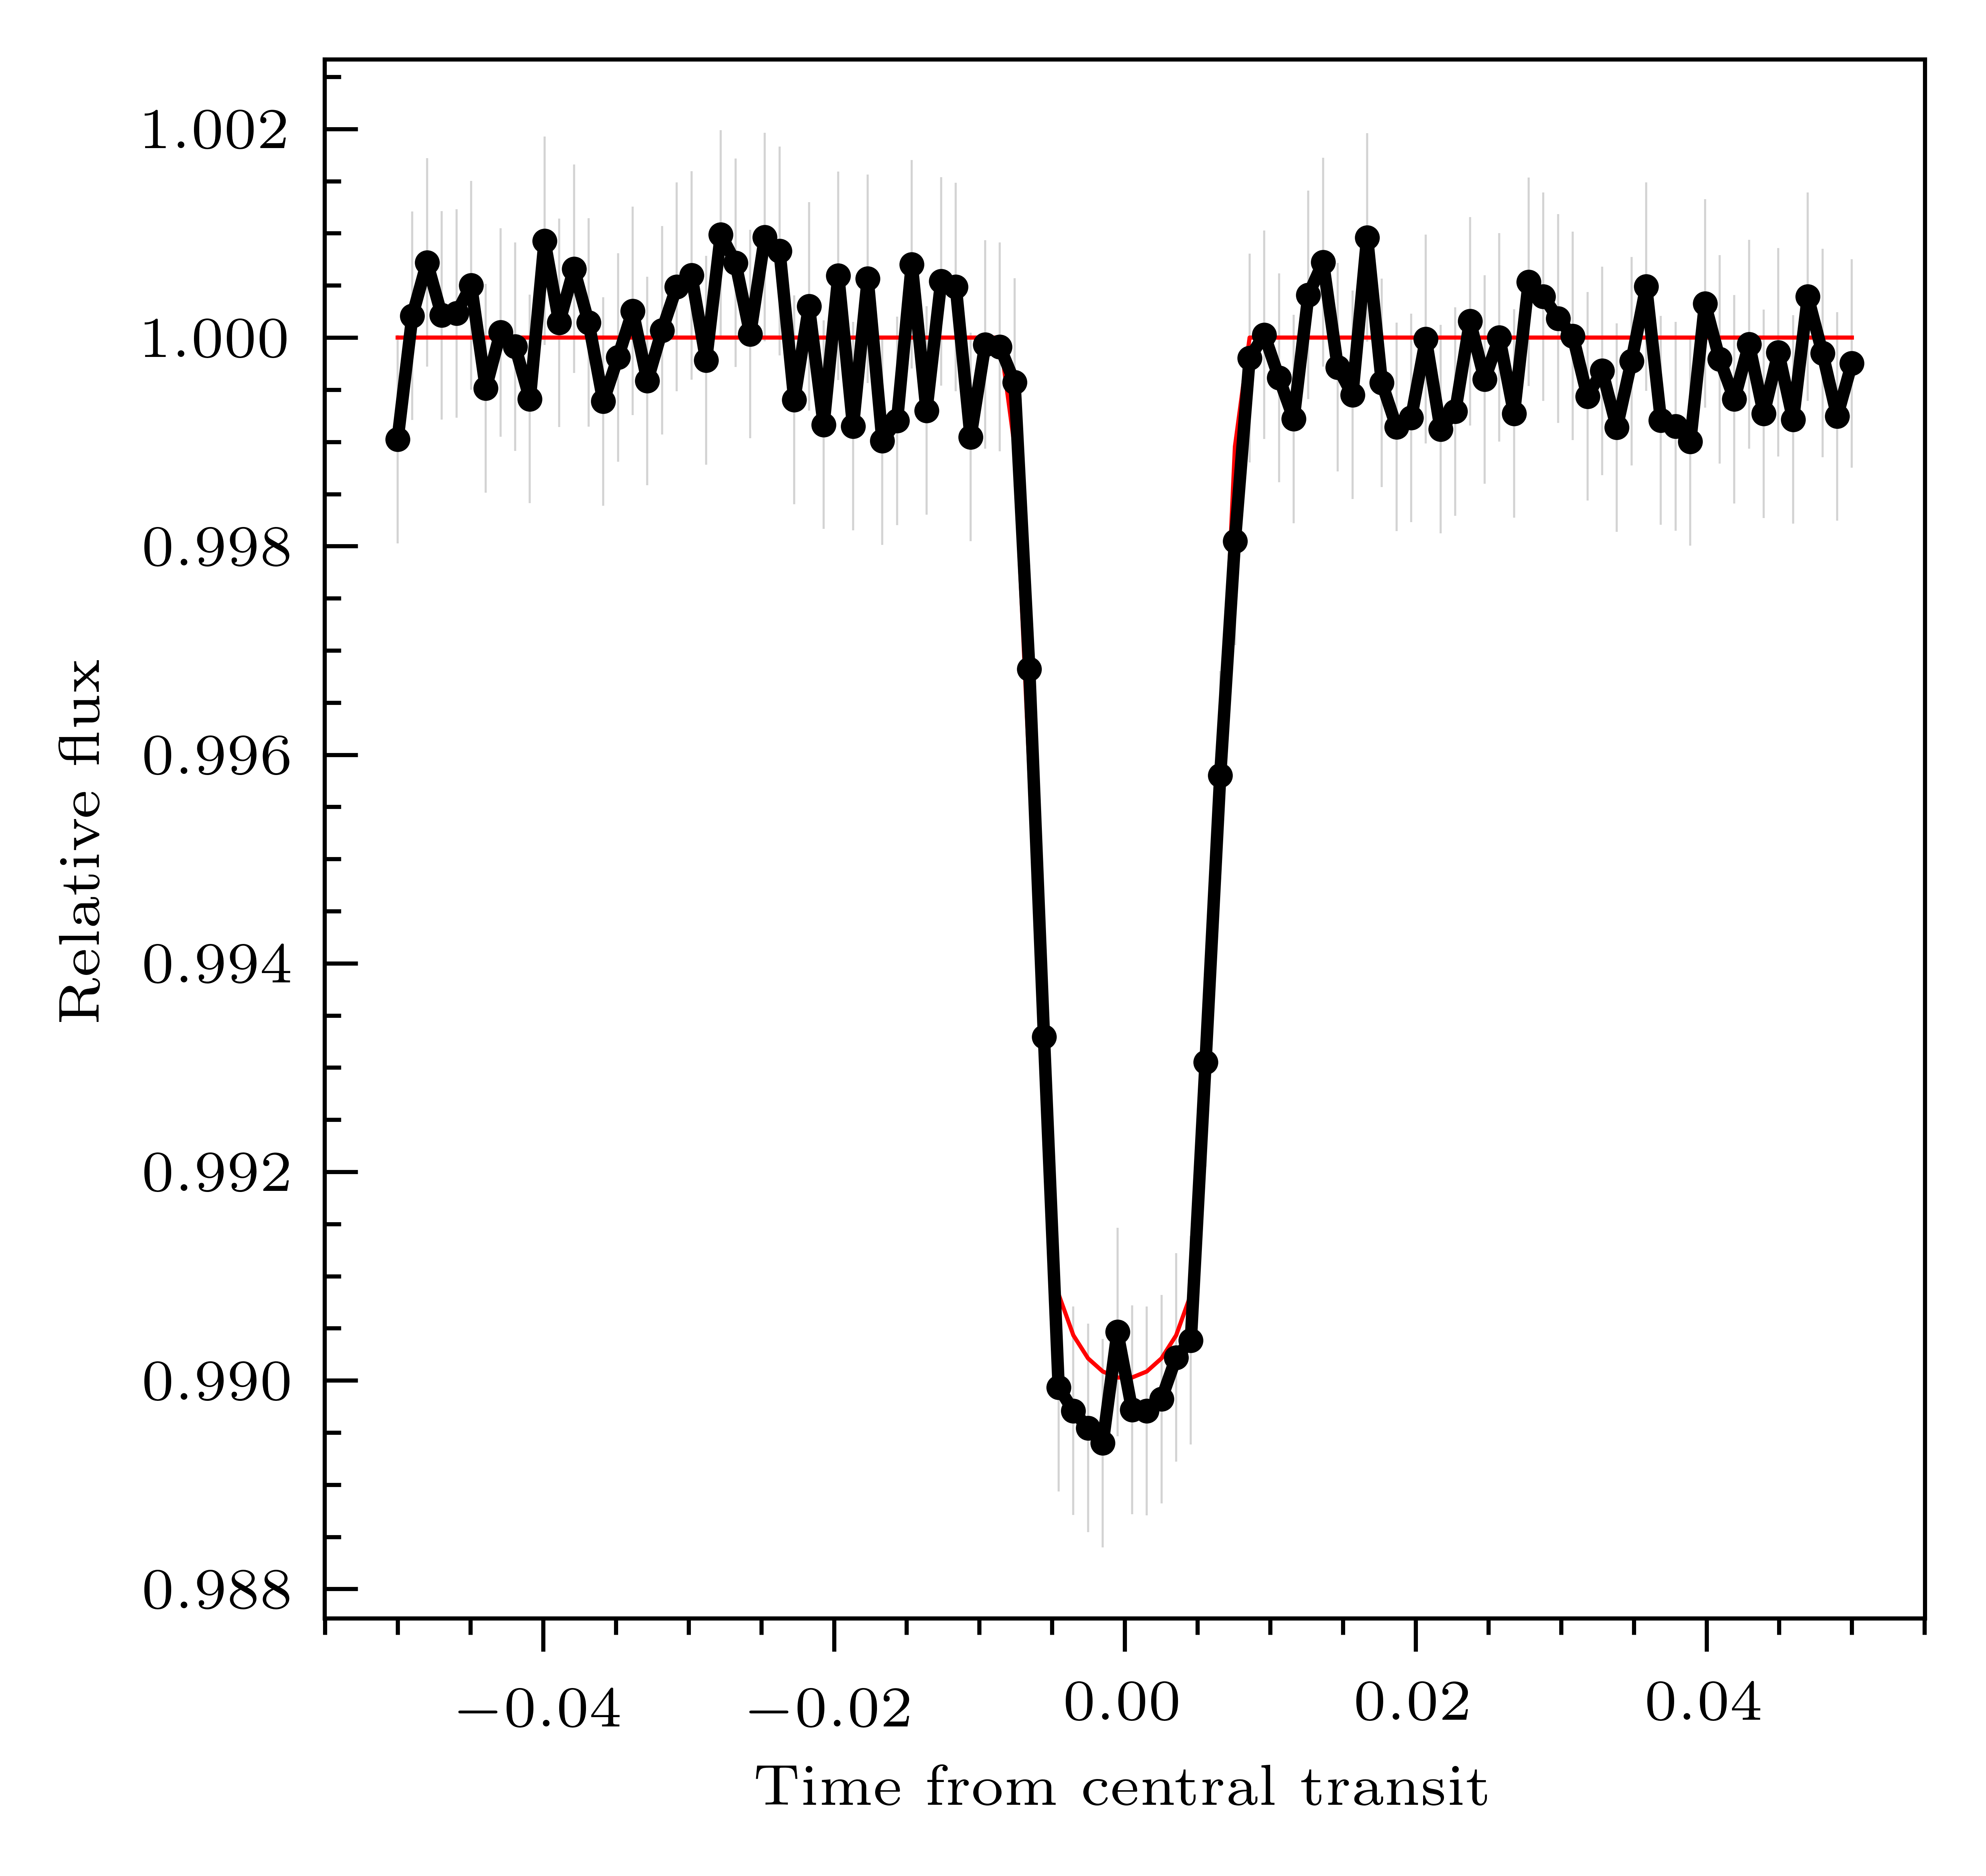

In [4]:
# set up a model transit example
params = batman.TransitParams()
params.t0 = 0.                       # time of inferior conjunction
params.per = 1.                      # orbital period
params.rp = 0.1                      # planet radius (in units of stellar radii)
params.a = 15.                       # semi-major axis (in units of stellar radii)
params.inc = 87.                     # orbital inclination (in degrees)
params.ecc = 0.                      # eccentricity
params.w = 90.                       # longitude of periastron (in degrees)
params.u = [0.1, 0.3]                # limb darkening coefficients
params.limb_dark = "quadratic"       # limb darkening model

t = np.linspace(-0.05, 0.05, 100)    # example times
m = batman.TransitModel(params, t)   # initializes model
flux_model = m.light_curve(params)         # calculates light curve
noise = np.array(random.sample(range(-1000, 1000), len(flux_model)))/1E6
flux = flux_model + noise
error = np.array([0.001]*len(flux))

# begin plotting
general()
one_column()
fig, ax = plt.subplots(1)
#ax.errorbar(t, flux, yerr=error, ecolor='lightgrey', marker='o', markersize=2, elinewidth=0.25)
ax.scatter(t, flux, s=1, color='black')
ax.plot(t, flux_model, linewidth=0.5, color='red')
ax.set_xlabel("Time from central transit")
ax.set_ylabel("Relative flux")
plt.show()